# SABR Model Test Code

In [1]:
import imp
import numpy as np
import matplotlib.pyplot as plt
import option_models as opt

In [2]:
### only run this when you changed the class definition
CODE_CHANGED = True
if( CODE_CHANGED ):
    imp.reload(opt)

## 1. Pricing using Hagan's formula (provided)

### (1) SABR for $0<\beta\le 1$

In [3]:
# Parameters
strike = np.linspace(75,125,num=25)
# strike = 110 # should work for scalar value 
forward = 100
sigma = 0.2
texp = 1
alpha = 0.3
rho = 0.25
beta = 1

In [4]:
# Create model
sabr_bsm = opt.sabr.ModelHagan(texp, sigma, alpha=alpha, rho=rho, beta=beta)
sabr_bsm.__dict__

{'beta': 1,
 'texp': 1,
 'sigma': 0.2,
 'alpha': 0.3,
 'rho': 0.25,
 'intr': 0,
 'divr': 0,
 'bsm_model': <option_models.bsm.Model at 0x1d17bdc30f0>}

In [5]:
# This is how you price. you can get either price or bsm_vol
price = sabr_bsm.price(strike, forward)
bsm_vol = sabr_bsm.bsm_vol(strike, forward)

price, bsm_vol

C:\Users\silen\Documents\GitHub\PHBS_ASP_2019\HW3\option_models\sabr.py:44: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  xx_zz[ind] = np.log( (yy[[ind]] + (zz[ind]-rho))/(1-rho) ) / zz[ind]


(array([25.54990056, 23.6710906 , 21.84772723, 20.08808242, 18.39998119,
        16.79046024, 15.26547396, 13.82967094, 12.48625486, 11.23693323,
        10.08194855,  9.0201795 ,  8.0492952 ,  7.16594441,  6.36596195,
         5.64457698,  4.99661108,  4.41665739,  3.8992357 ,  3.43892089,
         3.03044477,  2.66877274,  2.34915782,  2.06717523,  1.81874082]),
 array([0.19740451, 0.19730124, 0.19731138, 0.19742763, 0.19764276,
        0.19794962, 0.19834124, 0.19881083, 0.19935186, 0.19995804,
        0.2006234 , 0.20134229, 0.20210938, 0.20291966, 0.2037685 ,
        0.20465155, 0.20556483, 0.20650464, 0.2074676 , 0.20845059,
        0.20945078, 0.21046559, 0.21149265, 0.21252984, 0.21357521]))

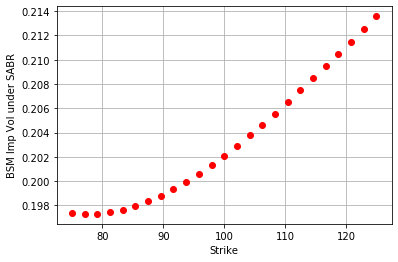

In [6]:
# volatility smile plot: try with different parameters
plt.plot(strike, bsm_vol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('BSM Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

In [7]:
# implied vol (sigma in this case)
# you should get back the original sigma
sabr_bsm.impvol(price[11], strike[11], forward)

0.19999999999936008

### (2) SABR for $\beta=0$

In [8]:
strike = np.linspace(75,125,num=25)
#strike = 1
forward = 100
sigma = 20
texp = 1
alpha = 0.5
rho = -0.25
beta = 0

In [9]:
nvol = opt.sabr.norm_vol(strike, forward, texp, sigma, alpha=alpha, rho=rho)

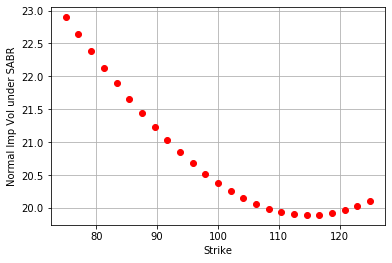

In [10]:
plt.plot(strike, nvol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('Normal Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

In [11]:
sabr_norm = opt.sabr.ModelNormalHagan(texp, sigma, alpha=alpha, rho=rho)
sabr_norm.__dict__

{'beta': 0.0,
 'texp': 1,
 'sigma': 20,
 'alpha': 0.5,
 'rho': -0.25,
 'intr': 0,
 'divr': 0,
 'normal_model': <option_models.normal.Model at 0x1d17c1696a0>}

In [12]:
price = sabr_norm.price(strike, forward)
norm_vol = sabr_norm.norm_vol(strike, forward)
price, norm_vol

(array([26.59695921, 24.75853528, 22.95673964, 21.19638261, 19.4826555 ,
        17.82107839, 16.21741812, 14.67757267, 13.20742012, 11.81263312,
        10.49846428,  9.26951283,  8.12948788,  7.08098803,  6.12531972,
         5.26237563,  4.49059068,  3.80698489,  3.20729256,  2.68616625,
         2.23743499,  1.85439056,  1.53007481,  1.2575435 ,  1.03008923]),
 array([22.898288  , 22.63620745, 22.38073263, 22.1326082 , 21.89263645,
        21.66167534, 21.44063425, 21.2304669 , 21.03216098, 20.84672415,
        20.67516621, 20.5184775 , 20.37760417, 20.25342105, 20.1467038 ,
        20.05810179, 19.98811408, 19.93707021, 19.9051177 , 19.89221722,
        19.89814614, 19.92250965, 19.9647587 , 20.02421277, 20.10008575]))

In [13]:
# implied vol (e.g. sigma)
sabr_norm.impvol(price[11], strike[11], forward)

19.999999999999922

### (3) Smile calibration to 3 options

In [14]:
strike3 = np.array([90, 100, 110])
price3 = sabr_norm.price(strike3, forward)
norm_vol3 = sabr_norm.norm_vol(strike3, forward)

price3, norm_vol3

(array([14.37778096,  8.12948788,  3.9368394 ]),
 array([21.18982474, 20.37760417, 19.94575372]))

In [15]:
# makre sure this return the original sigma, alpha, rho
sabr_norm.calibrate3(norm_vol3, strike3, forward, is_vol=True)

C:\Users\silen\Documents\GitHub\PHBS_ASP_2019\HW3\option_models\sabr.py:66: RuntimeWarning: invalid value encountered in sqrt
  yy = np.sqrt(1 + zeta*(zeta - 2*rho))
C:\Users\silen\Documents\GitHub\PHBS_ASP_2019\HW3\option_models\sabr.py:70: RuntimeWarning: invalid value encountered in less
  ind = np.where(abs(zeta) < 1e-5)
C:\Users\silen\Documents\GitHub\PHBS_ASP_2019\HW3\option_models\sabr.py:73: RuntimeWarning: invalid value encountered in greater_equal
  ind = np.where(zeta >= 1e-5)
C:\Users\silen\Documents\GitHub\PHBS_ASP_2019\HW3\option_models\sabr.py:76: RuntimeWarning: invalid value encountered in less_equal
  ind = np.where(zeta <= -1e-5)


array([0.1, 0.1, 0. ])

In [16]:
# makre sure this return the original sigma, alpha, rho
sabr_norm.calibrate3(price3, strike3, forward, is_vol=False)

array([0.1, 0.1, 0. ])

Below is same for sabr_bsm

In [17]:
strike3 = np.array([90, 100, 110])
price3 = price = sabr_bsm.price(strike3, forward)
bsm_vol3 = sabr_bsm.bsm_vol(strike3, forward)

price3, bsm_vol3

(array([13.55352055,  8.0492952 ,  4.52747026]),
 array([0.19891353, 0.20210938, 0.20631472]))

In [18]:
# makre sure this return the original sigma, alpha, rho
sabr_norm.calibrate3(bsm_vol3, strike3, forward, is_vol=True)

array([ 0.20210927, -0.00263994, -0.28215023])

In [19]:
# makre sure this return the original sigma, alpha, rho
sabr_norm.calibrate3(price3, strike3, forward, is_vol=False)

array([0.1, 0.1, 0. ])

## 2. Pricing under MC method

In [20]:
strike = np.linspace(75,125,num=25)
forward = 100

In [21]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_mc = opt.sabr.ModelBsmMC(sabr_bsm.texp, sabr_bsm.sigma, 
                                  alpha=sabr_bsm.alpha, rho=sabr_bsm.rho, beta=sabr_bsm.beta)

{'beta': 1, 'texp': 1, 'sigma': 0.2, 'alpha': 0.3, 'rho': 0.25, 'intr': 0, 'divr': 0, 'bsm_model': <option_models.bsm.Model object at 0x000001D17BDC30F0>}


In [22]:
price_hagan = sabr_bsm.price(strike, forward)
price_mc = sabr_bsm_mc.price(strike, forward)

# make sure the two prices are similar
price_hagan, price_mc

(array([25.54990056, 23.6710906 , 21.84772723, 20.08808242, 18.39998119,
        16.79046024, 15.26547396, 13.82967094, 12.48625486, 11.23693323,
        10.08194855,  9.0201795 ,  8.0492952 ,  7.16594441,  6.36596195,
         5.64457698,  4.99661108,  4.41665739,  3.8992357 ,  3.43892089,
         3.03044477,  2.66877274,  2.34915782,  2.06717523,  1.81874082]),
 array([25.61375223, 23.75803202, 21.96091519, 20.22772926, 18.5659493 ,
        16.98225779, 15.47667929, 14.05779795, 12.7263139 , 11.48880735,
        10.34986627,  9.30585745,  8.34373134,  7.46495006,  6.66575528,
         5.94350655,  5.28952114,  4.69755078,  4.16592676,  3.69005703,
         3.26220132,  2.87993654,  2.54014335,  2.24221916,  1.98011553]))

Repeat the same for beta = 0

In [23]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_mc = opt.sabr.ModelNormalMC(sabr_norm.texp, sabr_norm.sigma, 
                                   alpha=sabr_norm.alpha, rho=sabr_norm.rho, beta=sabr_norm.beta)

{'beta': 0.0, 'texp': 1, 'sigma': 20, 'alpha': 0.5, 'rho': -0.25, 'intr': 0, 'divr': 0, 'normal_model': <option_models.normal.Model object at 0x000001D17C1696A0>}


In [24]:
price_hagan = sabr_norm.price(strike, forward)
price_mc = sabr_norm_mc.price(strike, forward)

# make sure the two prices are similar
price_hagan, price_mc

(array([26.59695921, 24.75853528, 22.95673964, 21.19638261, 19.4826555 ,
        17.82107839, 16.21741812, 14.67757267, 13.20742012, 11.81263312,
        10.49846428,  9.26951283,  8.12948788,  7.08098803,  6.12531972,
         5.26237563,  4.49059068,  3.80698489,  3.20729256,  2.68616625,
         2.23743499,  1.85439056,  1.53007481,  1.2575435 ,  1.03008923]),
 array([27.07813103, 25.2378341 , 23.43292642, 21.67109677, 19.95428685,
        18.29348863, 16.69596107, 15.16665154, 13.70596949, 12.31967962,
        11.01454735,  9.78731489,  8.64250648,  7.58767585,  6.62356   ,
         5.74675472,  4.95346176,  4.23749817,  3.60413236,  3.04611898,
         2.56087128,  2.14021545,  1.77979766,  1.47217475,  1.20880962]))

## 3. Pricing under conditional MC method

In [25]:
strike = np.linspace(75,125,num=25)
forward = 100

In [26]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_cmc = opt.sabr.ModelBsmCondMC(sabr_bsm.texp, sabr_bsm.sigma, 
                                       alpha=sabr_bsm.alpha, rho=sabr_bsm.rho, beta=sabr_bsm.beta)

{'beta': 1, 'texp': 1, 'sigma': 0.2, 'alpha': 0.3, 'rho': 0.25, 'intr': 0, 'divr': 0, 'bsm_model': <option_models.bsm.Model object at 0x000001D17BDC30F0>}


In [27]:
price_hagan = sabr_bsm.price(strike, forward)
price_mc = sabr_bsm_cmc.price(strike, forward)

# make sure the two prices are similar
price_hagan, price_mc

(array([25.54990056, 23.6710906 , 21.84772723, 20.08808242, 18.39998119,
        16.79046024, 15.26547396, 13.82967094, 12.48625486, 11.23693323,
        10.08194855,  9.0201795 ,  8.0492952 ,  7.16594441,  6.36596195,
         5.64457698,  4.99661108,  4.41665739,  3.8992357 ,  3.43892089,
         3.03044477,  2.66877274,  2.34915782,  2.06717523,  1.81874082]),
 array([25.38838037, 23.50311859, 21.67156644, 19.90144774, 18.20009327,
        16.57417737, 15.02948977, 13.57075538, 12.20150974, 10.92403293,
         9.73934024,  8.64722399,  7.64633866,  6.73431948,  5.90792446,
         5.1631899 ,  4.49559035,  3.90019544,  3.37181751,  2.90514548,
         2.49486217,  2.13574344,  1.82273878,  1.55103405,  1.3160973 ]))

Repeat the same for beta = 0

In [28]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_cmc = opt.sabr.ModelNormalCondMC(sabr_norm.texp, sabr_norm.sigma, alpha=sabr_norm.alpha, 
                                        rho=sabr_norm.rho, beta=sabr_norm.beta)

{'beta': 0.0, 'texp': 1, 'sigma': 20, 'alpha': 0.5, 'rho': -0.25, 'intr': 0, 'divr': 0, 'normal_model': <option_models.normal.Model object at 0x000001D17C1696A0>}


In [29]:
price_hagan = sabr_norm.price(strike, forward)
price_mc = sabr_norm_cmc.price(strike, forward)
    
# make sure the two prices are similar
price_hagan, price_mc

(array([26.59695921, 24.75853528, 22.95673964, 21.19638261, 19.4826555 ,
        17.82107839, 16.21741812, 14.67757267, 13.20742012, 11.81263312,
        10.49846428,  9.26951283,  8.12948788,  7.08098803,  6.12531972,
         5.26237563,  4.49059068,  3.80698489,  3.20729256,  2.68616625,
         2.23743499,  1.85439056,  1.53007481,  1.2575435 ,  1.03008923]),
 array([25.89870484, 24.04062039, 22.22694529, 20.46340627, 18.75581846,
        17.10995435, 15.53139991, 14.02540367, 12.59672506, 11.24948948,
         9.98705717,  8.81191284,  7.72558214,  6.72857951,  5.8203905 ,
         4.99948948,  4.26339172,  3.608737  ,  3.03139991,  2.52662101,
         2.0891518 ,  1.71340627,  1.39361196,  1.12395372,  0.89870484]))

## Compare the MC variance between brute-force MC and conditional MC
For this, you should not use the random number seed

In [30]:
# for beta = 1, the MC variance between MC method and conditional MC are respectively
bsmPriceMC = np.array([sabr_bsm_mc.price(strike, forward) for i in range(100)])
bsmPriceCondMC = np.array([sabr_bsm_cmc.price(strike, forward) for i in range(100)])
bsmPriceMC.std(axis = 0), bsmPriceCondMC.std(axis = 0)

(array([0.19982106, 0.19700239, 0.19357971, 0.18978912, 0.18545241,
        0.1807039 , 0.17498942, 0.16874701, 0.16195505, 0.15524579,
        0.14841587, 0.14137803, 0.13368273, 0.12621954, 0.11942751,
        0.11350419, 0.10797971, 0.10303504, 0.09853882, 0.0940442 ,
        0.08973294, 0.08538857, 0.08094825, 0.07682827, 0.07319068]),
 array([8.27977968e-06, 1.04956708e-05, 1.28879592e-05, 1.53929320e-05,
        1.79372152e-05, 2.04425315e-05, 2.28306920e-05, 2.50283324e-05,
        2.69709899e-05, 2.86062374e-05, 2.98957203e-05, 3.08160730e-05,
        3.13587925e-05, 3.15292292e-05, 3.13448982e-05, 3.08333358e-05,
        3.00297170e-05, 2.89744286e-05, 2.77107553e-05, 2.62827972e-05,
        2.47336960e-05, 2.31042106e-05, 2.14316510e-05, 1.97491545e-05,
        1.80852734e-05]))

In [31]:
# for beta = 0, the MC variance between MC method and conditional MC are respectively
normPriceMC = np.array([sabr_norm_mc.price(strike, forward) for i in range(100)])
normPriceCondMC = np.array([sabr_norm_cmc.price(strike, forward) for i in range(100)])
normPriceMC.std(axis = 0), normPriceCondMC.std(axis = 0)

(array([0.18901214, 0.18540785, 0.18130928, 0.17691561, 0.17195481,
        0.16692217, 0.16187169, 0.15601728, 0.14974392, 0.1435526 ,
        0.13758483, 0.13226792, 0.12688826, 0.12075721, 0.11433302,
        0.10821069, 0.10195399, 0.0952831 , 0.08828394, 0.08095229,
        0.07363275, 0.06681724, 0.0604416 , 0.05477774, 0.049321  ]),
 array([1.65932846e-05, 1.89552462e-05, 2.14042825e-05, 2.38916473e-05,
        2.63612312e-05, 2.87514303e-05, 3.09975514e-05, 3.30346333e-05,
        3.48005218e-05, 3.62389985e-05, 3.73027441e-05, 3.79559213e-05,
        3.81761789e-05, 3.79559213e-05, 3.73027441e-05, 3.62389985e-05,
        3.48005218e-05, 3.30346333e-05, 3.09975514e-05, 2.87514303e-05,
        2.63612312e-05, 2.38916473e-05, 2.14042825e-05, 1.89552462e-05,
        1.65932846e-05]))